In [1]:
import os
import pandas as pd

In [11]:
path = 'Desktop/data'

In [30]:
current_path.split('\\')

['Desktop/data', '2020-12-09', 'Vasiliy_Ivanov']

In [8]:
pd.read_csv('Desktop/data/2020-12-03/Vasiliy_Petrov/data.csv')

,Unnamed: 0,product_id,quantity
0,0,78,4
1,1,27,3


In [31]:
# Create df for all data
df = pd.DataFrame()
# Read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        data_path = f'{current_path}/{file}'
        
        temp_df = pd.read_csv(data_path)
        
        path_parts = current_path.split('\\')
        date = path_parts[-2]
        name = path_parts[-1]
        
        temp_df['date'] = date
        temp_df['name'] = name
        
        
        df = pd.concat((df, temp_df), axis=0)
        print(df.shape)

(6, 5)
(11, 5)
(15, 5)
(18, 5)
(20, 5)
(22, 5)
(27, 5)
(33, 5)
(39, 5)
(42, 5)
(48, 5)
(50, 5)
(53, 5)
(55, 5)
(57, 5)
(59, 5)
(62, 5)
(68, 5)
(73, 5)
(77, 5)
(80, 5)
(84, 5)
(88, 5)
(94, 5)
(96, 5)
(97, 5)
(101, 5)
(103, 5)
(105, 5)
(109, 5)
(112, 5)
(115, 5)
(120, 5)
(126, 5)
(127, 5)
(132, 5)
(138, 5)
(143, 5)
(149, 5)
(150, 5)
(154, 5)
(155, 5)
(158, 5)
(161, 5)


In [33]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [38]:
df.reset_index(drop=True, inplace=True)

In [40]:
df.quantity.sum()

480

In [42]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


In [46]:
top_buyers = df.groupby('name') \
  .agg({'quantity':'sum'}) \
  .sort_values('quantity', ascending=False)

In [59]:
top_buyers = top_buyers.query('quantity == quantity[0]')
        


In [78]:
top_buyers.reset_index(inplace=True)

In [87]:
print(top_buyers)

             name  quantity
0  Alexey_Smirnov        52
1    Petr_Smirnov        52


In [88]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


In [117]:
top_products = df.groupby('product_id') \
                 .agg({'quantity':'sum'}) \
                 .sort_values('quantity', ascending=False) \
                 .head(10)

In [122]:
top_products = top_products.reset_index()

In [123]:
top_products

,product_id,quantity
0,27,20
1,56,18
2,24,15
3,74,15
4,41,14
5,34,13
6,94,13
7,66,13
8,92,12
9,50,12


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='product_id', ylabel='quantity'>

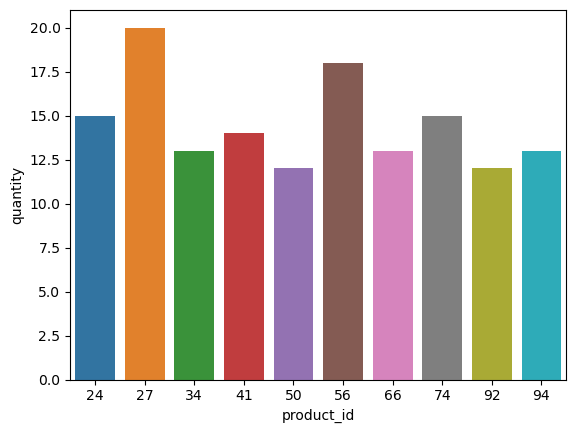

In [155]:
sns.barplot(data=top_products, x = 'product_id', y = 'quantity')


In [132]:
sales_date = df.groupby('date') \
    .agg({'quantity':'sum'}) \
    .reset_index()
    

<Axes: xlabel='date', ylabel='quantity'>

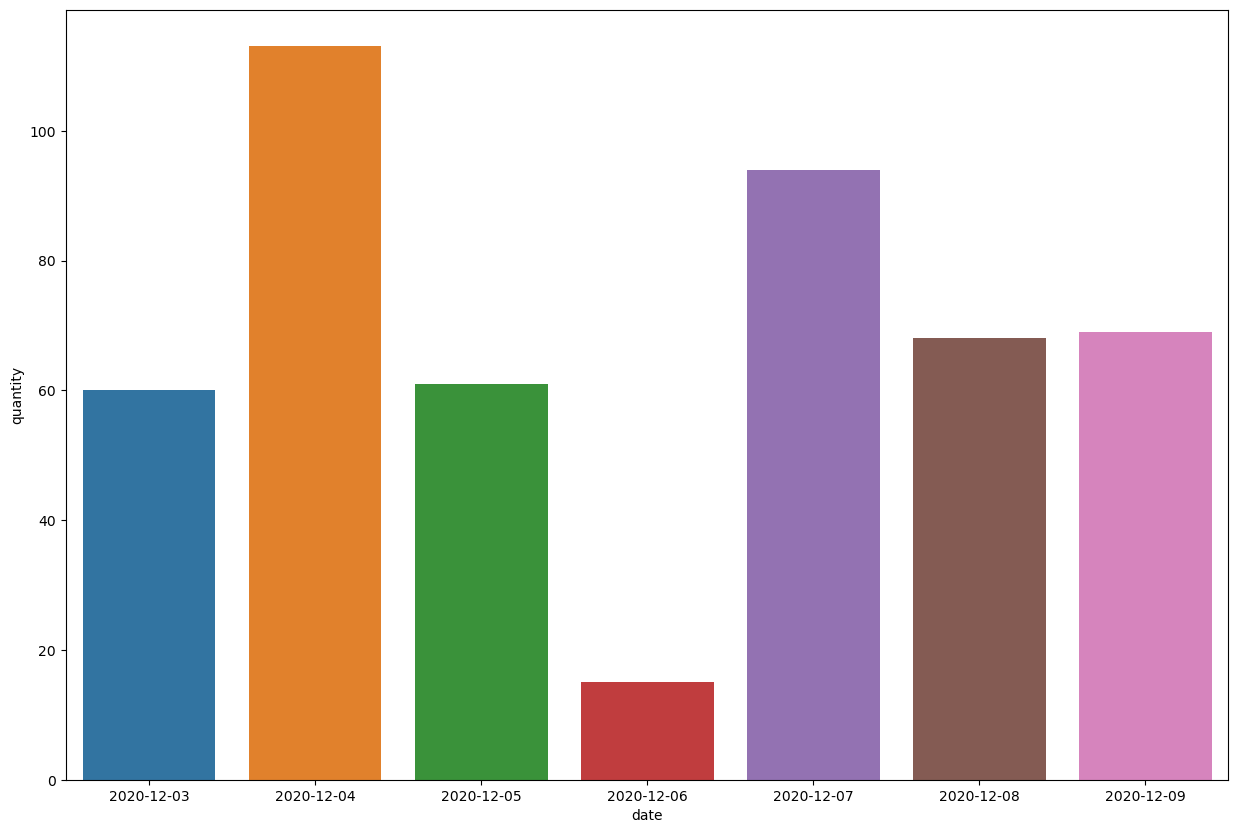

In [136]:
plt.figure(figsize=(15, 10))
sns.barplot(data=sales_date, x = 'date', y = 'quantity')

In [138]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


In [152]:
rebuy_users = df.groupby(['name', 'product_id']) \
                .agg({'date': pd.Series.nunique}) \
                .query('date > 1')
              
               

In [153]:
rebuy_users

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
